In [1]:
pip install ydata_profiling==4.12.2

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from statsmodels.tsa.seasonal import seasonal_decompose
from ydata_profiling import ProfileReport

import matplotlib.pyplot as plt
%matplotlib inline

# Pandas Profiling

**Pandas Profiling** è una libreria Python che permette di generare report di analisi esplorativa dei dati in modo rapido e automatico. È progettata per lavorare con i DataFrame di Pandas e fornisce una panoramica completa delle caratteristiche del dataset, tra cui:

**Statistiche descrittive**: medie, deviazioni standard, minimi, massimi, quartili, etc.

**Distribuzioni**: per ogni variabile, viene visualizzata una distribuzione delle frequenze, la presenza di valori mancanti, e la loro distribuzione.

**Correlazion**i: tra variabili numeriche, con un'analisi delle correlazioni statistiche.

**Outlier**: rilevamento di valori anomali o estremi nelle colonne numeriche.

**Distribuzione di dati categorici**: per le variabili non numeriche.
Il report generato è interattivo e visivamente completo, permettendo di esplorare facilmente il dataset e identificare potenziali problemi come dati mancanti, correlazioni strane, o distribuzioni non uniformi. È particolarmente utile per l'analisi preliminare dei dati.

In [3]:
df = pd.read_csv("data/titanic.csv")

In [4]:
profile = ProfileReport(df, title="Report del Dataset", explorative=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Data set Diabets prediction

Dataset importato da Kaggle
https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset

In [5]:
df2 = pd.read_csv("data/diabetes_prediction_dataset.csv")

In [6]:
df2.head()

gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0

In [7]:
df2.shape

(100000, 9)

In [8]:
profile2 = ProfileReport(df2, title="Report del Dataset", explorative=True)

In [9]:
profile2.to_file("report_dataset1.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
profile2.to_notebook_iframe()


In [11]:
"""
Funzioni vecchio dataset
from sklearn.preprocessing import LabelEncoder
# Inizializza l'encoder
label_encoder = LabelEncoder()

# Ottieni i valori unici dalla colonna 'Sesso' e applica Label Encoding
df2['Gender_encoded'] = label_encoder.fit_transform(df2['Gender'])
"""

"\nFunzioni vecchio dataset\nfrom sklearn.preprocessing import LabelEncoder\n# Inizializza l'encoder\nlabel_encoder = LabelEncoder()\n\n# Ottieni i valori unici dalla colonna 'Sesso' e applica Label Encoding\ndf2['Gender_encoded'] = label_encoder.fit_transform(df2['Gender'])\n"

In [12]:
df2.head(10)

gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   
5  Female  20.0             0              0           never  27.32   
6  Female  44.0             0              0           never  19.31   
7  Female  79.0             0              0         No Info  23.86   
8    Male  42.0             0              0           never  33.64   
9  Female  32.0             0              0           never  27.32   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  
5          6.6                   85         0  
6          6.5                  200         1  
7          5.7                   85         0  
8          4.8                  145         0  
9          5.0                  100         0

In [13]:
df2.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [14]:
# Diabetes Diagnosis

In [15]:
# Glucose_Level, Age, HbA1c, BMI, Insulin_Resistance, Physical_Activity_Level, Family_History_Diabetes

In [16]:
# converto la classe gender in numerico
from sklearn.preprocessing import LabelEncoder
# Inizializza l'encoder
label_encoder = LabelEncoder()

# Ottieni i valori unici dalla colonna 'Sesso' e applica Label Encoding
df2['Gender_encoded'] = label_encoder.fit_transform(df2['gender'])

In [17]:
df2['gender'].unique

<bound method Series.unique of 0        Female
1        Female
2          Male
3        Female
4          Male
          ...  
99995    Female
99996    Female
99997      Male
99998    Female
99999    Female
Name: gender, Length: 100000, dtype: object>

In [18]:
df2.head()

gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  Gender_encoded  
0          6.6                  140         0               0  
1          6.6                   80         0               0  
2          5.7                  158         0               1  
3          5.0                  155         0               0  
4          4.8                  155         0               1

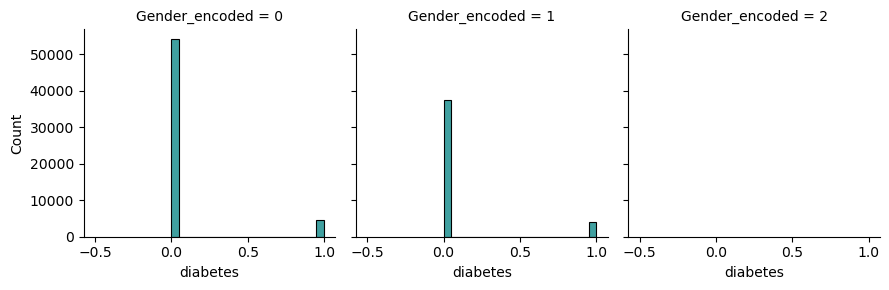

In [19]:
g = sns.FacetGrid(df2, col="Gender_encoded")
g.map(sns.histplot, "diabetes", bins = 20, color="teal")
plt.tight_layout()

plt.show()

In [20]:
df2['age'].describe()

count    100000.000000
mean         41.885856
std          22.516840
min           0.080000
25%          24.000000
50%          43.000000
75%          60.000000
max          80.000000
Name: age, dtype: float64

In [21]:
df2['age_level'] = df2['age'].apply(lambda x: 'young' if x < 25 else 'adult' if x < 55 else 'old')

In [22]:
df2['age_gender'] = df2['age_level'] + "_" + df2['gender']

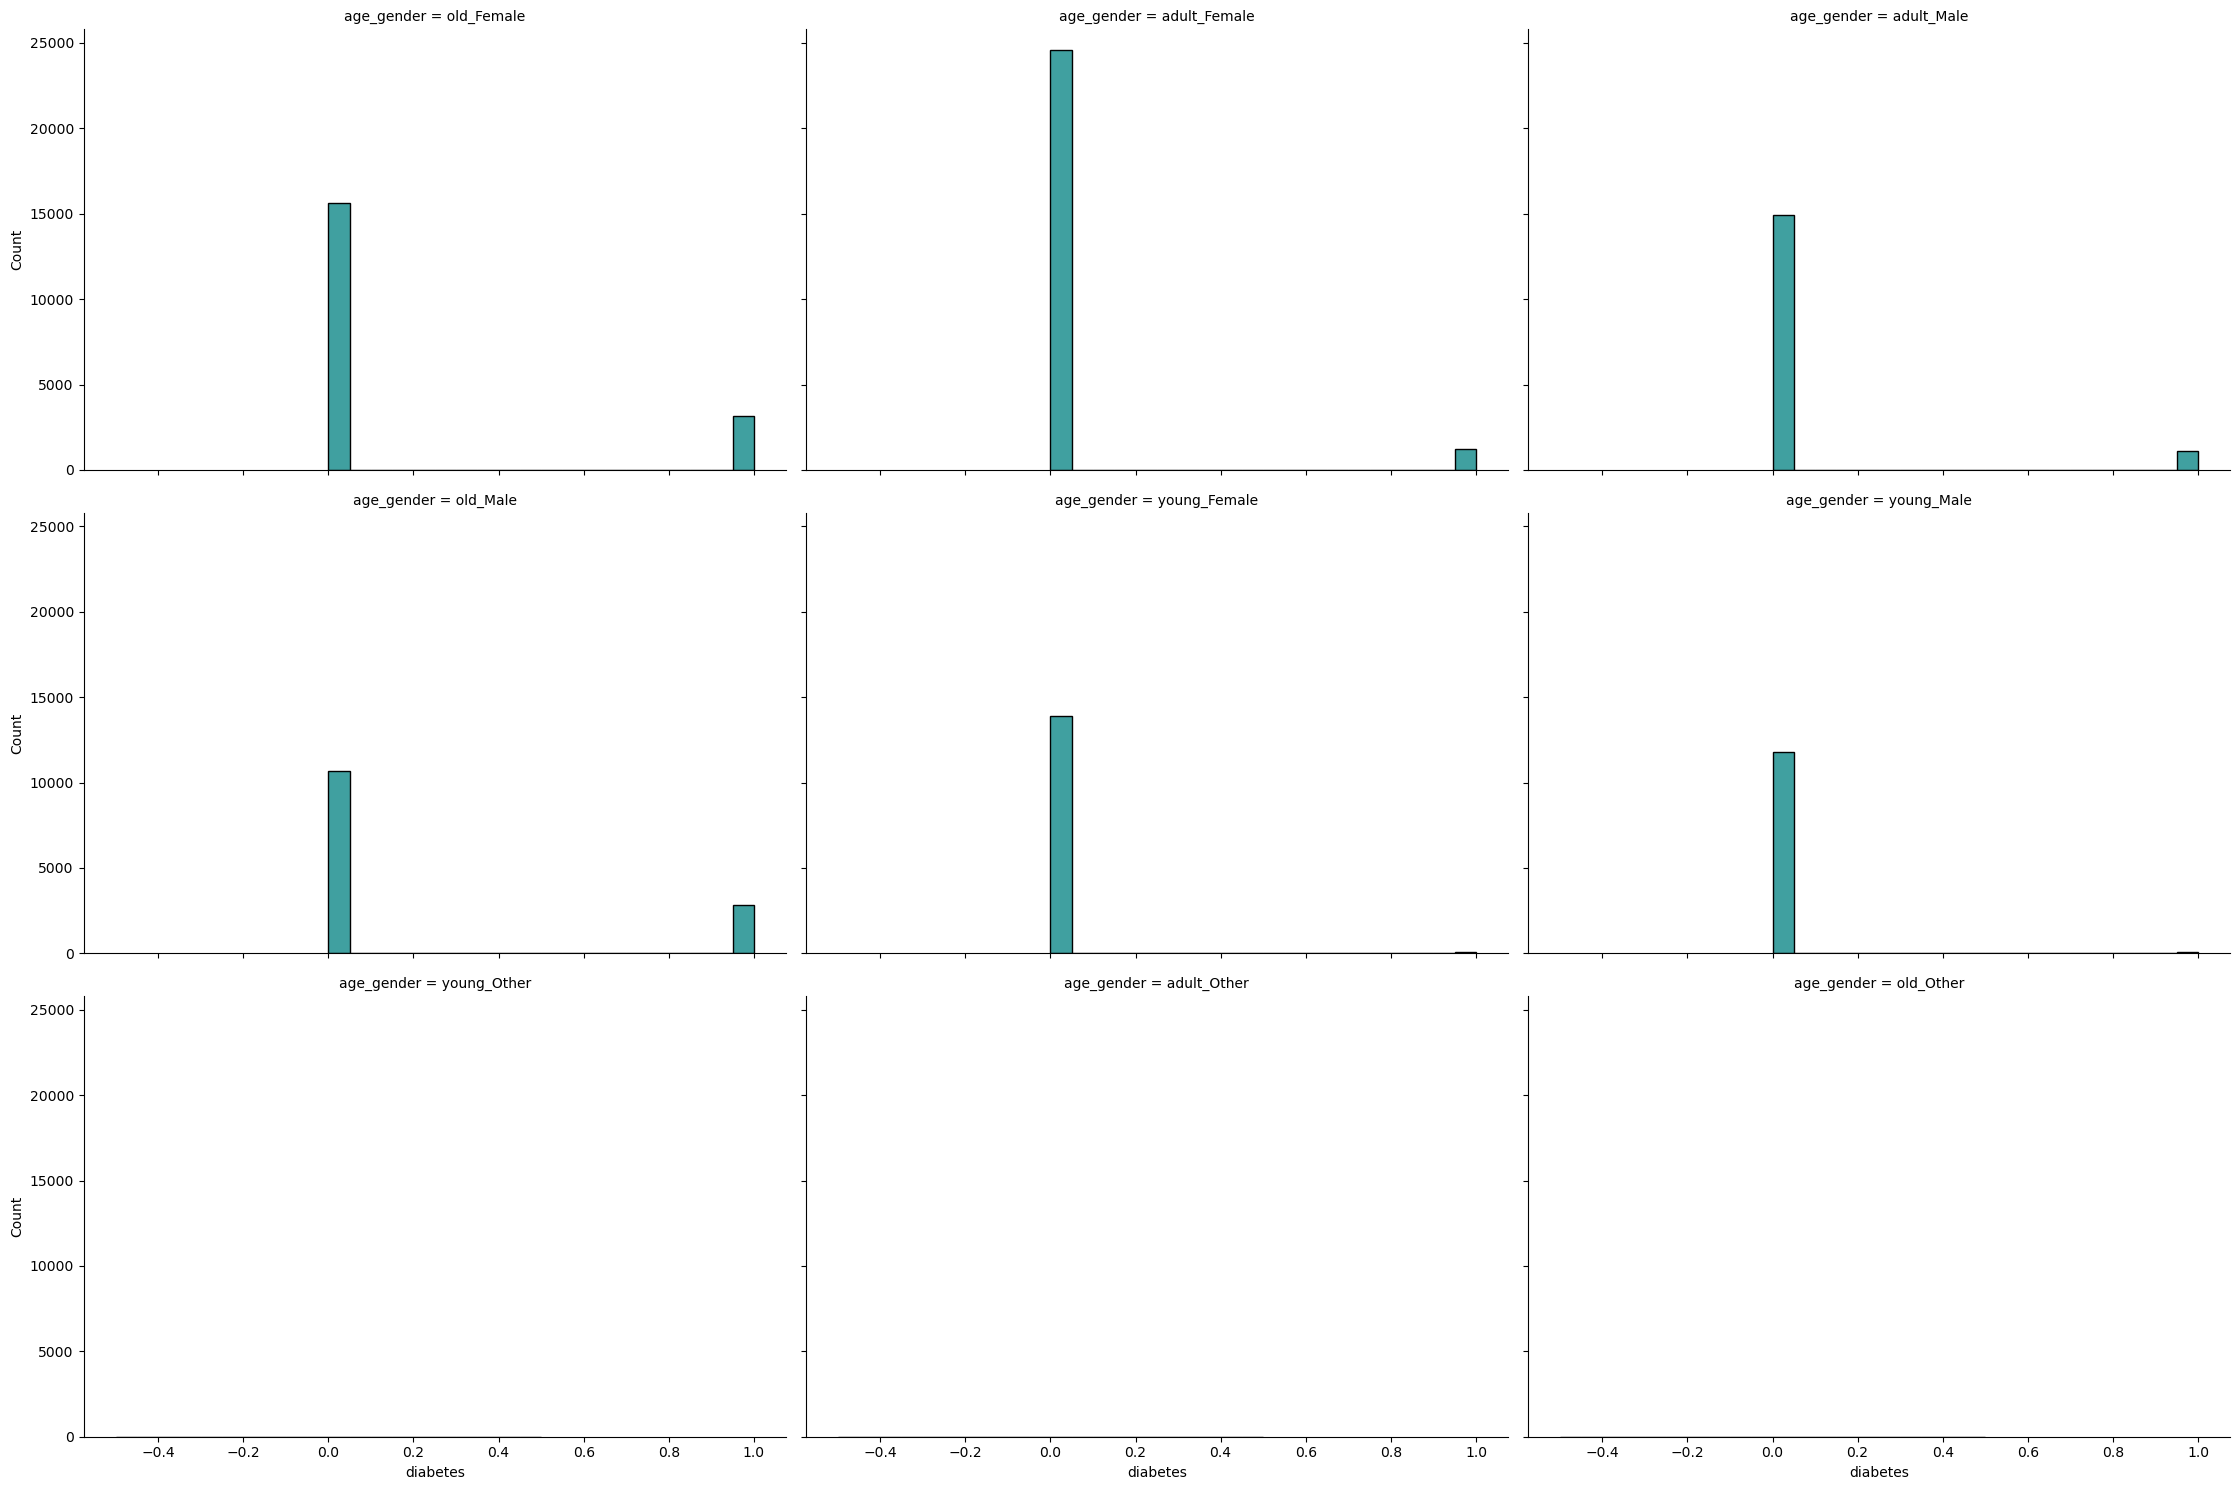

In [23]:
g = sns.FacetGrid(df2, col="age_gender",height=5, aspect=1.5, col_wrap=3)
g.map(sns.histplot, "diabetes", bins = 20, color="teal")
plt.tight_layout()

plt.show()

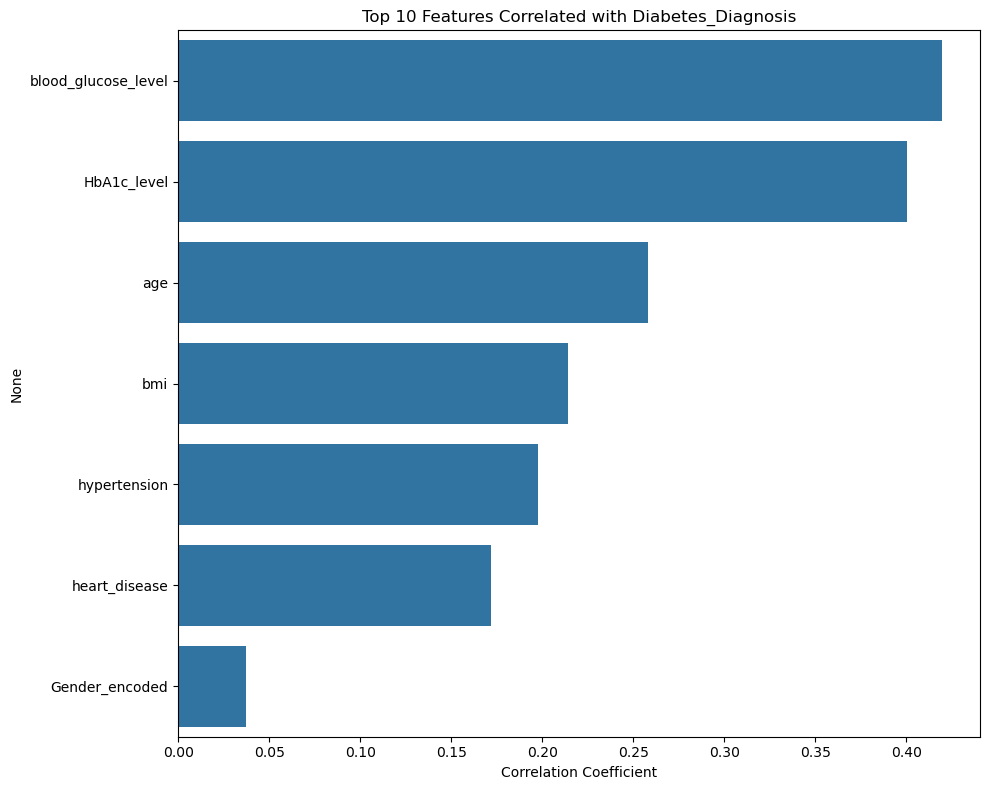

diabetes                 1.000 (Strong)
blood_glucose_level    0.420 (Moderate)
HbA1c_level            0.401 (Moderate)
age                    0.258 (Moderate)
bmi                    0.214 (Moderate)
hypertension           0.198 (Moderate)
heart_disease          0.172 (Moderate)
Gender_encoded         0.037 (Moderate)
Name: diabetes, dtype: object

In [46]:
numeric_db = df2.select_dtypes(include = ['int64', 'float64'])

correlation = numeric_db.corr()['diabetes'].sort_values(ascending = False)


plt.figure(figsize = (10,8))
top_features = correlation[1:]
sns.barplot(x = top_features.values, y = top_features.index)
plt.title('Top 10 Features Correlated with Diabetes_Diagnosis')
plt.xlabel('Correlation Coefficient')
plt.tight_layout()
plt.show()

correlation.apply(lambda x: f"{x:.3f} ({'Strong' if abs(x) > 0.5 else 'Moderate' if abs(x) > 0.03 else 'Weak'})").head(10)

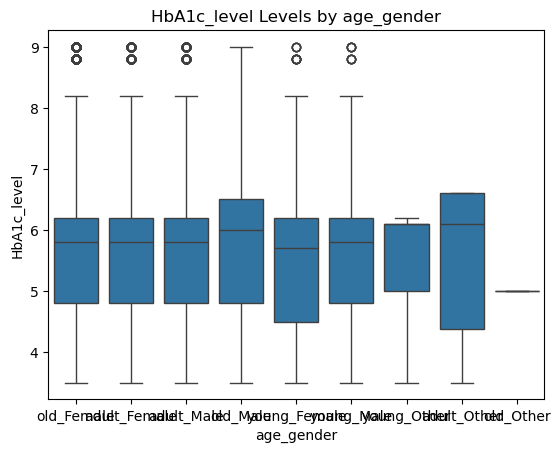

In [48]:
# %% [code]
# Box Plot: HbA1c_level levels by gende

x = "age_gender"
y = "HbA1c_level"
sns.boxplot(x=x, y=y, data=df2)
plt.title(f"{y} Levels by {x}")
plt.show()

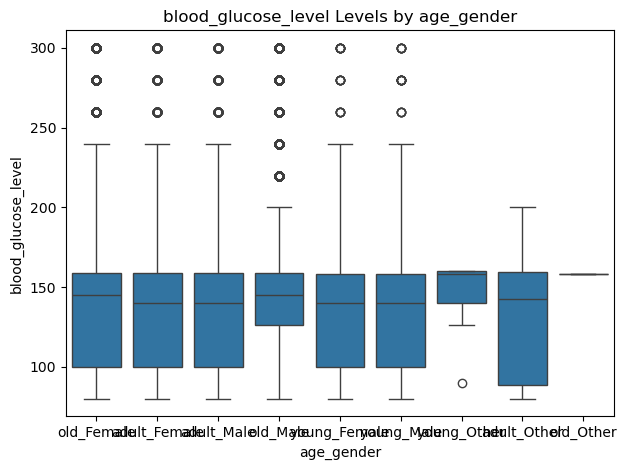

In [24]:
x = "age_gender"
y = "blood_glucose_level"
sns.boxplot(x=x, y=y, data=df2)
plt.title(f"{y} Levels by {x}")
plt.tight_layout()

plt.show()

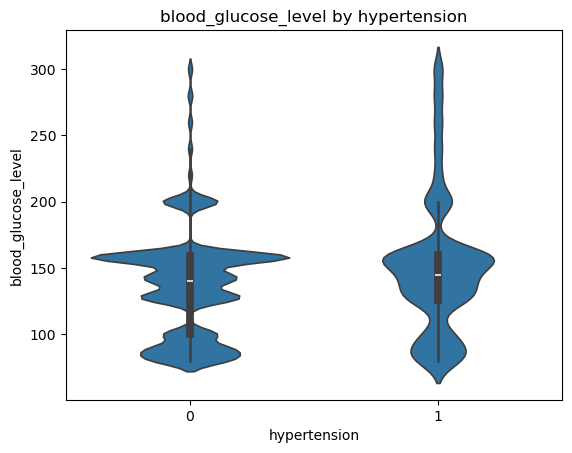

In [49]:
# %% [code]
# Violin Plot: Glucose Level by Smoking Status

x = "hypertension"
y = "blood_glucose_level"

sns.violinplot(x=x, y=y, data=df2)
plt.title(f"{y} by {x}")
plt.show()

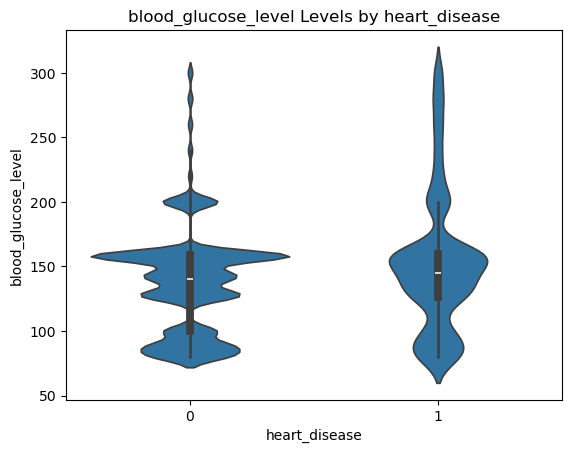

In [26]:
x = "heart_disease"
y = "blood_glucose_level"
sns.violinplot(x=x, y=y, data=df2)
plt.title(f"{y} Levels by {x}")
plt.show()

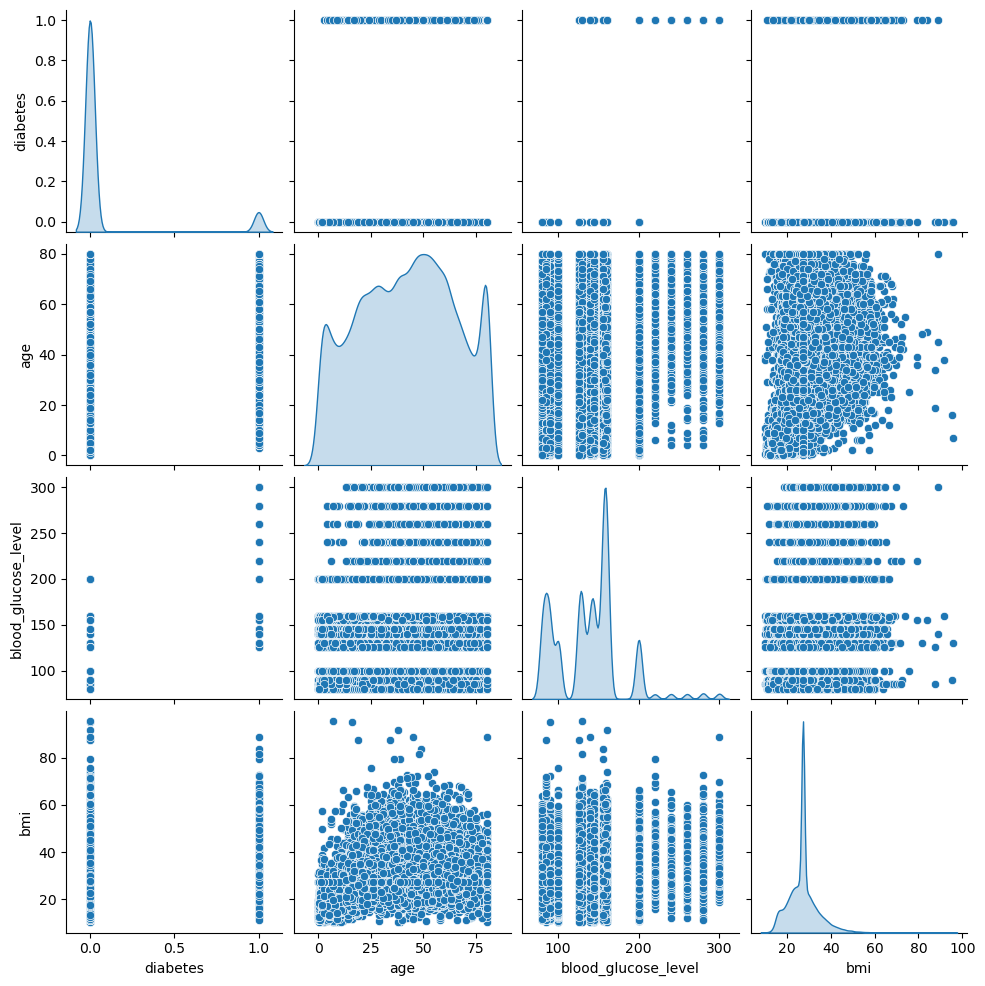

In [29]:
sns.pairplot(df2[['diabetes', 'age', 'blood_glucose_level', 'bmi']], diag_kind='kde')
plt.show()

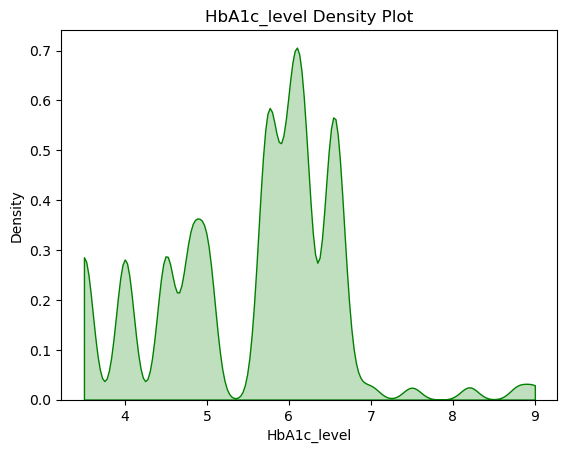

In [44]:
# %% [code]
# KDE Plot for BMI Distribution using Seaborn
x = "HbA1c_level"
sns.kdeplot(data=df2, x=x, fill=True, color='green', clip=(min(df2[x]), max(df2[x])))
plt.title("HbA1c_level Density Plot")
plt.show()

# Tips
è utile dividere in classi le variabili numeriche, rivedere dal suo notebook.
**creare classi impattanti per poter prevedere il nostro target**

In [35]:
df2['bglc'] = df2['blood_glucose_level'].apply(lambda x : "high" if x > 200 else "low")

In [38]:
df2[df2['bglc'] =="high"].shape[0]/df2.shape[0]

0.03277

In [39]:
df2["sh_ht"] = df2["smoking_history"] + df2["hypertension"].astype(str)

In [40]:
df2["sh_ht"].head()

0      never0
1    No Info0
2      never0
3    current0
4    current1
Name: sh_ht, dtype: object

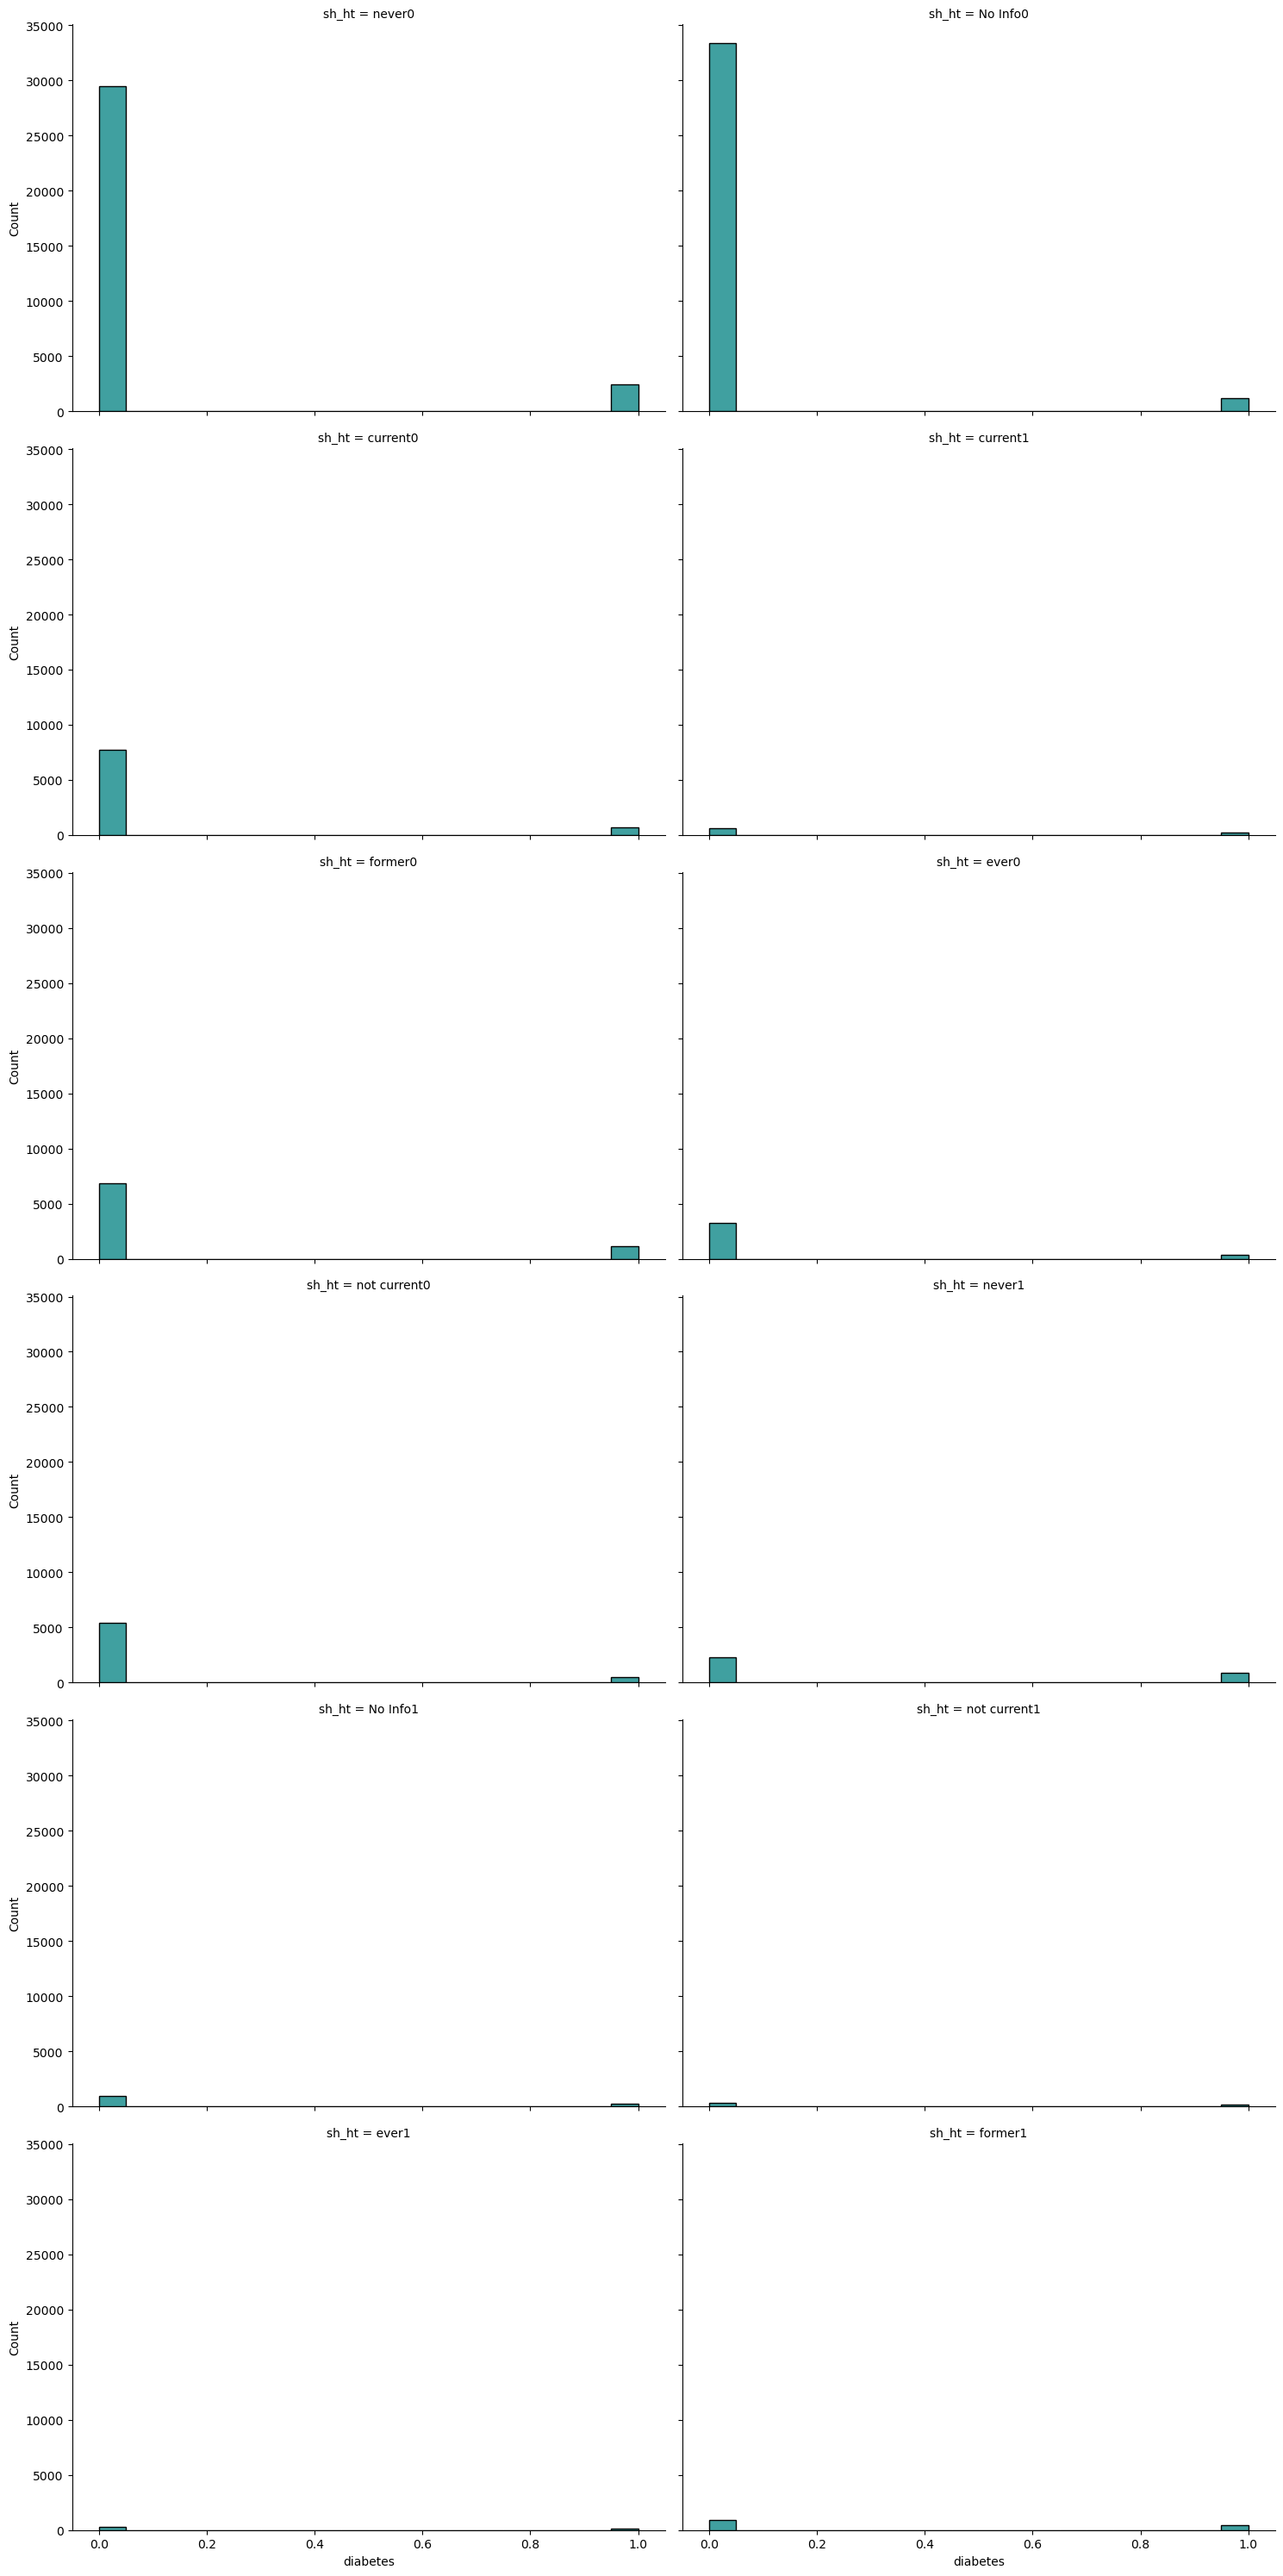

In [41]:
g = sns.FacetGrid(df2, col="sh_ht",height=5, aspect=1.5, col_wrap=2)
g.map(sns.histplot, "diabetes", bins = 20, color="teal")
plt.tight_layout()

plt.show()

## Costruiamo la classe che secondo noi è quella più probabile che abbia il diabete

In [31]:
df2["gender_class"] = df2["age"].apply(lambda x: "old" if x > 55 else "other")

df2["ht_class"] = "H"+ df2["hypertension"].astype(str)

df2["HbA1c_class"] = df2["HbA1c_level"].apply(lambda x: "high" if x > 5.5 else "other")

df2["final_class"] = df2["gender_class"] + '_' + df2["ht_class"]  + '_' + df2["HbA1c_class"]

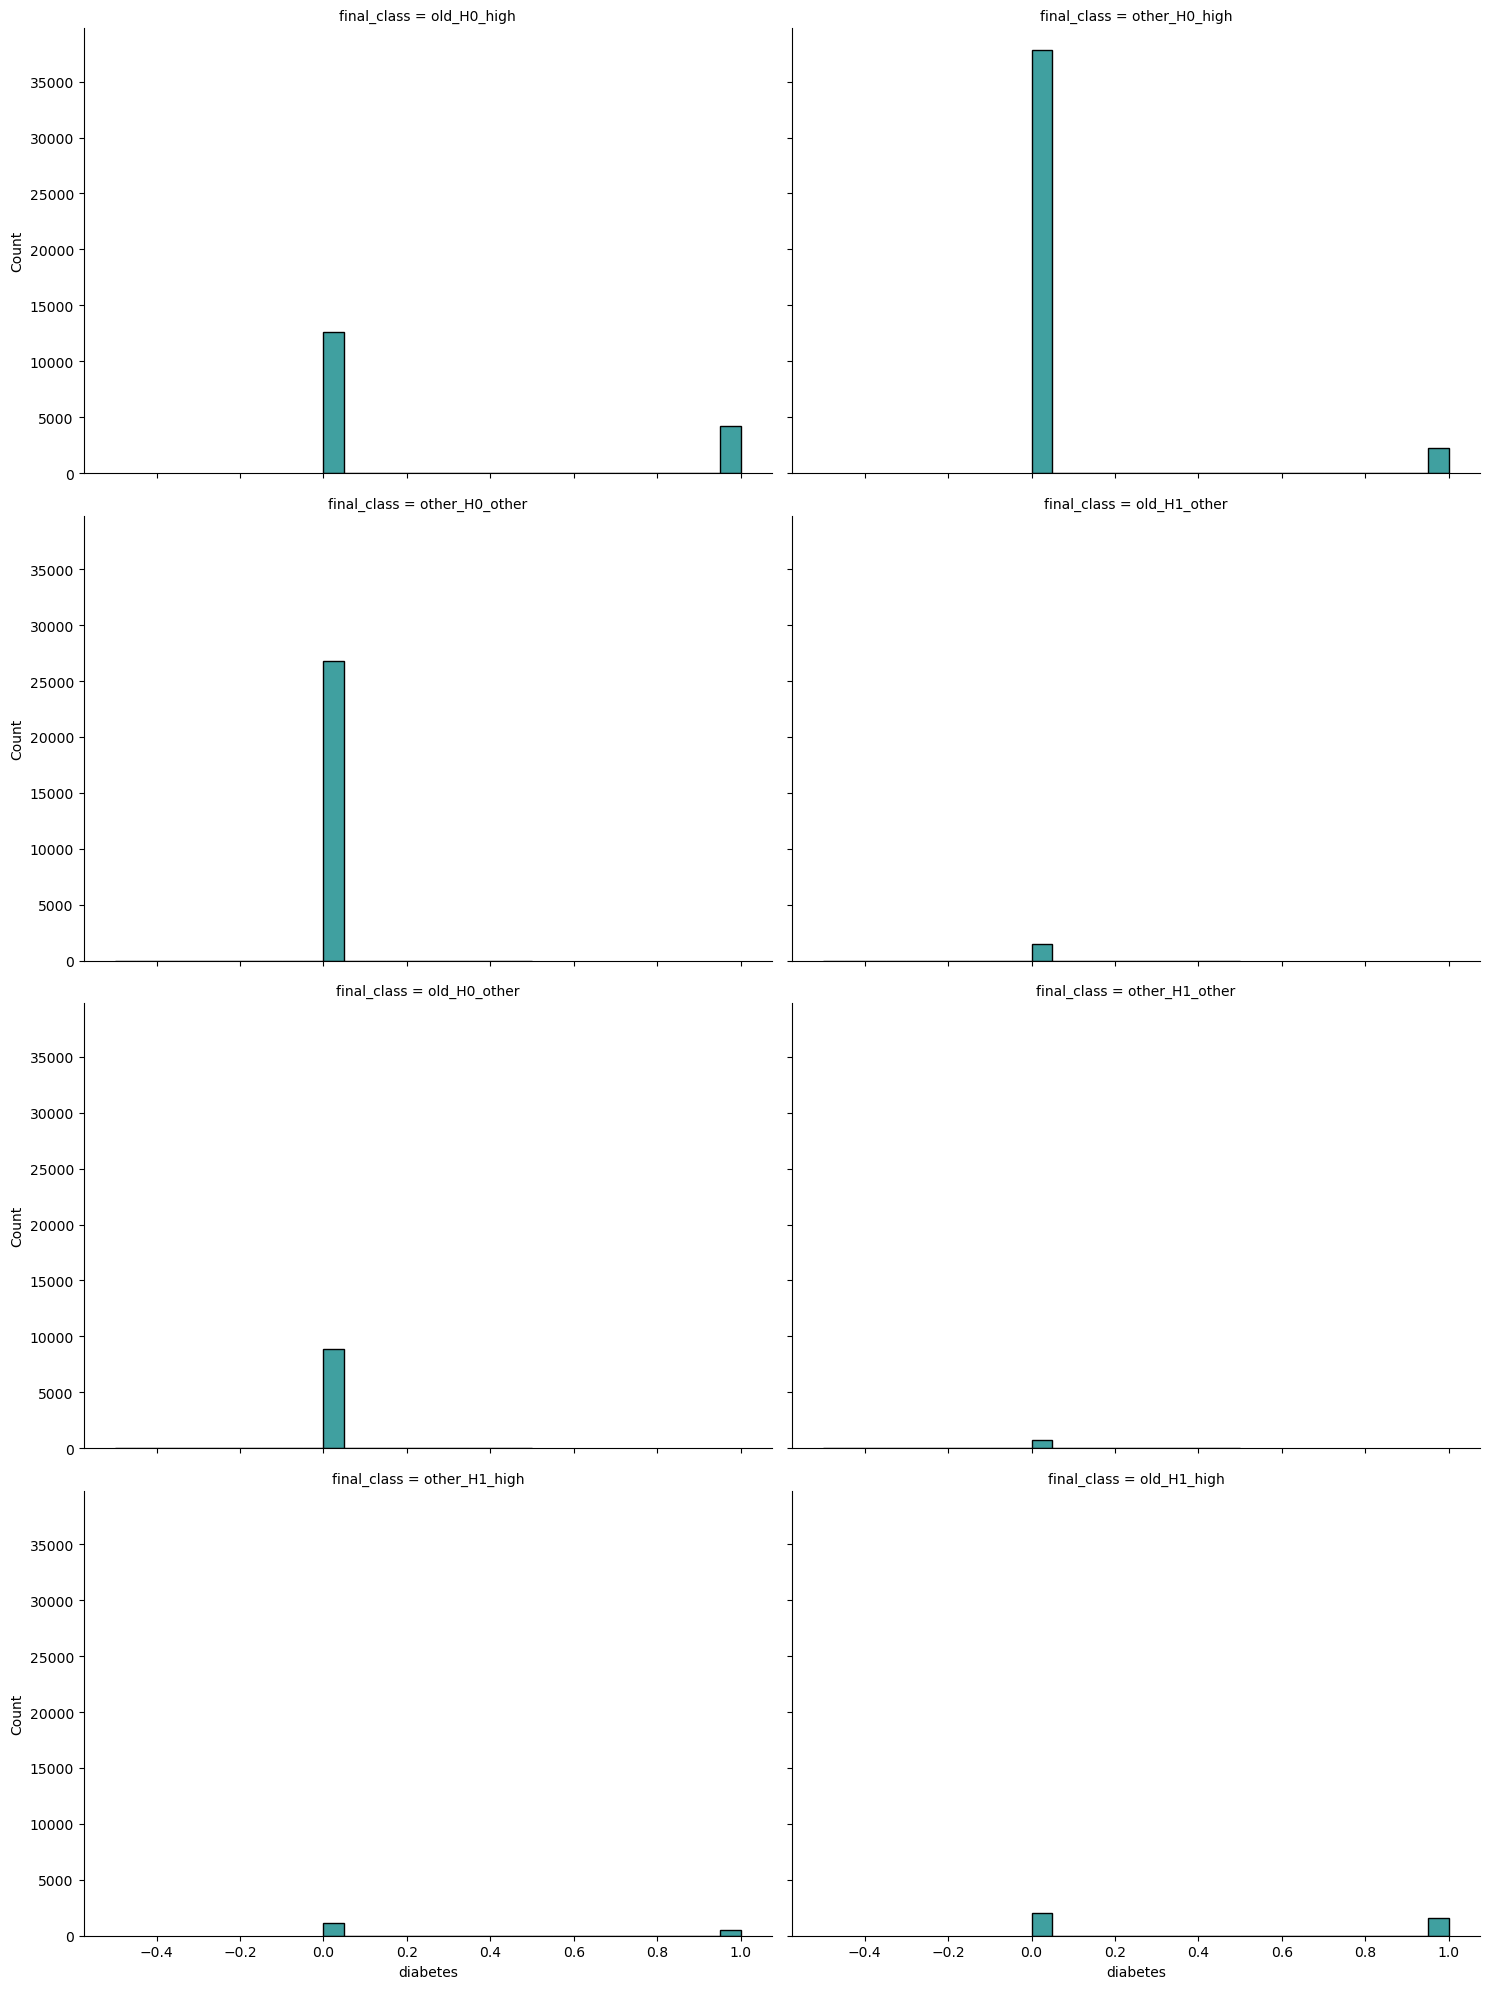

In [33]:
g = sns.FacetGrid(df2, col="final_class",height=5, aspect=1.5, col_wrap=2)
g.map(sns.histplot, "diabetes", bins = 20, color="teal")
plt.tight_layout()

plt.show()